In [1]:
# load sage packages
load('/Applications/SageMath/NumericalSemigroup.sage')
load('/Applications/SageMath/KunzPoset.sage')
load('/Applications/SageMath/PlotKunzPoset.sage')
from sage.combinat.posets.posets import FinitePoset

true
Successfully loaded Singular


In [2]:
# Given two posets P1 and P2, determine if P1 contains all relations in P2. If so, P1 is a refinement of P2
# @P1, @P2: poset objects
# output: boolean
def check_refinement(P1, P2):
    R1 = P1.hyperplane_desc
    R2 = P2.hyperplane_desc
    for r in R2:
        if r not in R1:
            return False
    return True

In [3]:
# Classify all posets of a kunz polyhedron by their dimensions
# @Ps: list of all posets for a kunz polyhedron (read from dataset)
# output: list of lists, where the i^th sublist contains posets of dimension i (recorded by indices)
def classify(Ps):
    result = []
    for i in range(Ps[0].m):
        result.append([])
    
    for i in range(len(Ps)):
        result[Ps[i].Dimension()].append(i)
    
    return result

In [4]:
# find all the posets below a given poset P using a classified list of posets by their dimensions
# @P: poset object
# @Pd: list of posets for a kunz polyhedron, classified by dimension (list of lists)
# @Ps: list of all posets for a kunz polyhedron (read from dataset)
# output: list of posets, recorded by indices
def child_posets(P, Pd, Ps):
    result = []
    d = P.Dimension()
    for i in Pd[d-1]:
        if check_refinement(Ps[i], P):
            result.append(i)
    return result

In [5]:
# for a given poset P, find the embedding dimension of all its child posets
# @P: poset object
# @Pd: list of posets for a kunz polyhedron, classified by dimension (list of lists)
# @Ps: list of all posets for a kunz polyhedron (read from dataset)
# output: list of 3-tuples (i, e, n), where i is the index of a poset, e its embedding dimension, and,
#              n the number of its defining facet equations
def child_ED(P, Pd, Ps):
    result = []
    d = P.Dimension()
    for i in Pd[d-1]:
        if check_refinement(Ps[i], P):
            result.append((i, len(Ps[i].atoms), len(Ps[i].hyperplane_desc)))
    return result

In [6]:
# for a given poset P, find the number of facets added for all its child posets
# @P: poset object
# @Pd: list of posets for a kunz polyhedron, classified by dimension (list of lists)
# @Ps: list of all posets for a kunz polyhedron (read from dataset)
# output: list of 2-tuples (i, n), where i is the index of a poset, and n the number of its defining facet equations
def child_relations(P, Pd, Ps):
    result = []
    d = P.Dimension()
    n = len(P.hyperplane_desc)
    for i in Pd[d-1]:
        if check_refinement(Ps[i], P):
            result.append((i, len(Ps[i].hyperplane_desc)))
    return result

In [7]:
# compute the cover relations for the DED lattice of a Kunz polyhedron
# @Ps: list of all posets for a kunz polyhedron (read from dataset)
# output: cover relations for the DED lattice, stored in the following format:
#         a list of 2-tuples ((d1,e1), (d2,e2)), where (d2,e2) covers (d1,e1)
#         d1 is the face dimension of the *child* poset and e1 its embedding dimension
#         d2 is the face dimension of the *parent* poset and e2 its embedding dimension
def ED_poset(Ps):
    result = []
    Pd = classify(Ps)
    for i in range(len(Ps)):
        P = Ps[i]
        d = P.Dimension()
        ed = len(P.atoms)
        ef = len(P.hyperplane_desc)
        lchild = child_ED(P, Pd, Ps)
        for (c, cd, cf) in lchild:
            if ((d-1, cd), (d, ed)) not in result:
                result.append(((d-1, cd), (d, ed)))  
    return result

In [8]:
# compute the cover relations for the DEF lattice of a Kunz polyhedron
# @Ps: list of all posets for a kunz polyhedron (read from dataset)
# output: cover relations for the DEF lattice, stored in the following format:
#         a list of 2-tuples ((d1,e1,n1), (d2,e2,n2)), where (d2,e2,n2) covers (d1,e1,n1)
#         d1 is the face dimension of the *child* poset, e1 its embedding dimension, and
#            n1 the number of its defining facet equations
#         Similar for (d2, e2, n2)
def EF_poset(Ps):
    result = []
    Pd = classify(Ps)
    for i in range(len(Ps)):
        P = Ps[i]
        d = P.Dimension()
        ed = len(P.atoms)
        ef = len(P.hyperplane_desc)
        lchild = child_ED(P, Pd, Ps)
        for (c, cd, cf) in lchild:
            if ((d-1, cd, cf), (d, ed, ef)) not in result:
                result.append(((d-1, cd, cf), (d, ed, ef)))
    return result

In [9]:
# compute the cover relations for the simplified DEF lattice of a Kunz polyhedron
# @Ps: list of all posets for a kunz polyhedron (read from dataset)
# output: cover relations for the DEF lattice, stored in the following format:
#         a list of 2-tuples ((d1,n1), (d2,n2)), where (d2,n2) covers (d1,n1)
#         d1 is the face dimension of the *child* poset, and n1 the number of its defining facet equations
#         Similar for (d2, n2)
def relation_poset(Ps):
    result = []
    Pd = classify(Ps)
    for i in range(len(Ps)):
        P = Ps[i]
        d = P.Dimension()
        ef = len(P.hyperplane_desc)
        lchild = child_relations(P, Pd, Ps)
        for (c, cf) in lchild:
            if ((d-1, cf), (d, ef)) not in result:
                result.append(((d-1, cf), (d, ef)))
    return result

In [10]:
# find posets whose number of defining facet equations is n and whose face dimension is d
# @Ps: list of all posets for a kunz polyhedron (read from dataset)
# @Pd: list of posets for a kunz polyhedron, classified by dimension (list of lists)
# d: integer
# n: integer
# output: list of posets, recorded by indices
def find_poset_nd(Ps, Pd, d, n):
    result = []
    pd = Pd[d]
    for i in pd:
        if len(Ps[i].hyperplane_desc) == n:
            result.append(i)
    return result

In [11]:
# find a poset with face dimension d and embedding dimension e
# @Ps: list of all posets for a kunz polyhedron (read from dataset)
# @Pd: list of posets for a kunz polyhedron, classified by dimension (list of lists)
# d: integer
# e: integer
# output: list of posets, recorded by indices
def find_poset_ed(Ps, Pd, d, e):
    result = []
    pd = Pd[d]
    for i in pd:
        if len(Ps[i].atoms) == e:
            result.append(i)
    return result

In [12]:
# find a poset below P by adding a single facet equation
# @P: poset object
# @Ps: list of all posets for a kunz polyhedron (read from dataset)
# @Pd: list of posets for a kunz polyhedron, classified by dimension (list of lists)
# output: an index of a poset or False
def add_one_facet(P, Pd, Ps):
    cd = child_ED(P, Pd, Ps)
    for i in range(len(cd)):
        if cd[i][2] - (len(P.hyperplane_desc)) == 1:
            return cd[i][0]
    return False

In [13]:
# this function is *supposed* to find a flag that contains the maximal jump of embedding dimension
# (in consturction or unnecessary for now)
def find_maximal_flag(Ps):
    result = [(0,Ps[0].m-1, Ps[0].m-1)]
    Pd = classify(Ps)
    P = Ps[0]
    while len(result) != Ps[0].m-2:
        cd = child_ED(P, Pd, Ps)
        #maxd = -1
        #c = 0
        #for i in range(len(cd)):
        #    if cd[i][1] - (Ps[0].m-len(result)) > maxd:
        #        c = cd[i][0]
        #        maxd = cd[i][1] - (Ps[0].m-len(result))
        #result.append((c, Ps[0].m-len(result), cd[i][1]))
        #P = Ps[c]
        for i in range(len(cd)):
            if cd[i][2] - (len(result)-1) == 1:
                P = Ps[cd[i][0]]
                result.append((cd[i][0], Ps[0].m-len(result)-1, cd[i][1]))
                break
            if (i == len(cd)-1):
                return result
        
    cd = child_ED(P, Pd, Ps)
    for i in range(len(cd)):
        if cd[i][1] == 1:
            result.append((cd[i][0],1,1))
            break
    return result

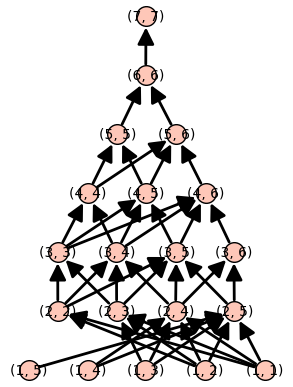

In [14]:
# load data for a Kunz polyhedron
facfile = '/Applications/SageMath/data/m8.fac'
hpfile = '/Applications/SageMath/data/m8.out'
Ps = KunzPoset.ReadFacesFromNormaliz(face_lattice_file_path=facfile, hplane_file_path=hpfile)

cover_relations = ED_poset(Ps)
FinitePoset(DiGraph(cover_relations).transitive_reduction()).plot()

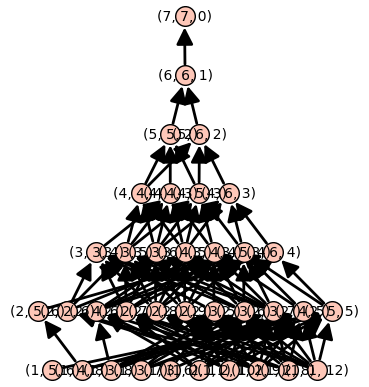

In [15]:
cover_relations = EF_poset(Ps)
FinitePoset(DiGraph(cover_relations).transitive_reduction()).plot()

In [16]:
# test which posets contain a child poset that can be obtained by adding a single facet equation
Pd = classify(Ps)
result = []
for i in range(len(Ps)):
    P = Ps[i]
    if P.Dimension() >= 3:
        if add_one_facet(P, Pd, Ps) == False:
            result.append(i)
print(result)

[59, 87, 109, 137, 141, 149, 169, 183, 189, 191, 225, 297, 301, 375, 377, 389, 395, 435, 461, 463, 464, 477, 501, 565, 575, 582, 699, 701, 723, 724, 797, 846, 913, 917, 926, 932, 937, 949, 951, 952, 965, 1006, 1007, 1172, 1252, 1259, 1268, 1292, 1302]


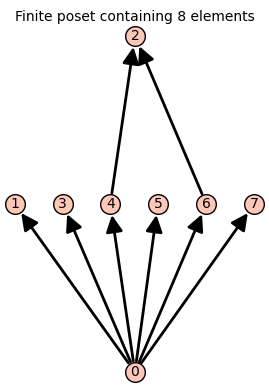

In [17]:
P = Ps[12]
P.poset

In [19]:
Pd = classify(Ps)
find_poset_ed(Ps, Pd, 3, 6)

[628, 797, 1017]

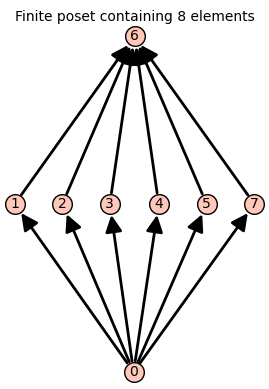

In [20]:
P = Ps[628]
P.poset

In [21]:
P.FindSemigroups(max_kunz_coord= 100, how_many = 1)

Likely contains no semigroups


[]

P = Ps[357]
P.poset

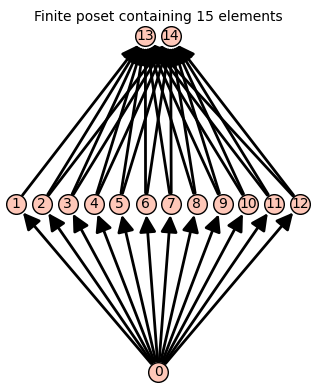

In [22]:
P = KunzPoset(semigroup_gens = [15,16,17,18,19,20,21,22,23,24,25,26,27])
P.poset